In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

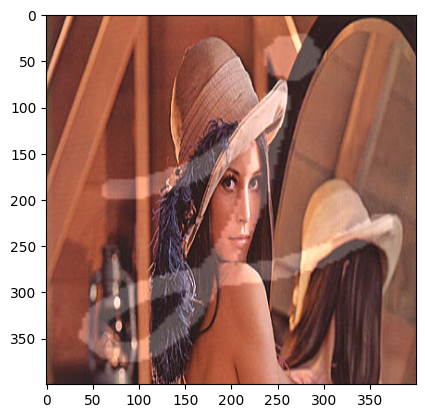

In [3]:
#Overlaying Images - adding an image to another image


img1BGR=cv2.imread('images/lena.jpg')
img1RGB=cv2.cvtColor(img1BGR,cv2.COLOR_BGR2RGB)

img2BGR=cv2.imread('images/j.png')
img2RGB=cv2.cvtColor(img2BGR,cv2.COLOR_BGR2RGB)

resized1=cv2.resize(img1RGB,(400,400))
resized2=cv2.resize(img2RGB,(400,400))

overlay=cv2.addWeighted(resized1,1,resized2,0.2,0)

plt.imshow(overlay)
plt.show()

Binary Thresholding


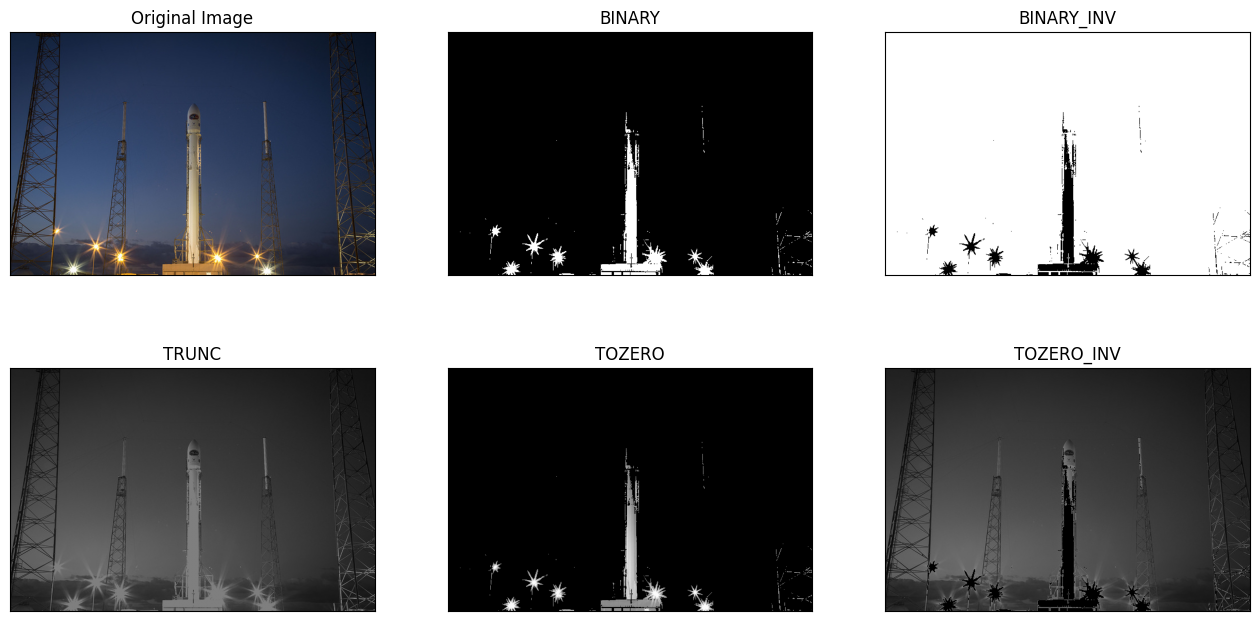

In [4]:
imgBGR = cv2.imread('images/rocket.jpg')
imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)

imGray = cv2.cvtColor(imgRGB,cv2.COLOR_RGB2GRAY)

ret, thresh1 = cv2.threshold(imGray,127,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(imGray,127,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(imGray,127,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(imGray,127,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(imGray,127,255,cv2.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [imgRGB, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:

The adaptiveMethod decides how the threshold value is calculated:

cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

The code below compares global thresholding and adaptive thresholding for an image with varying illumination:

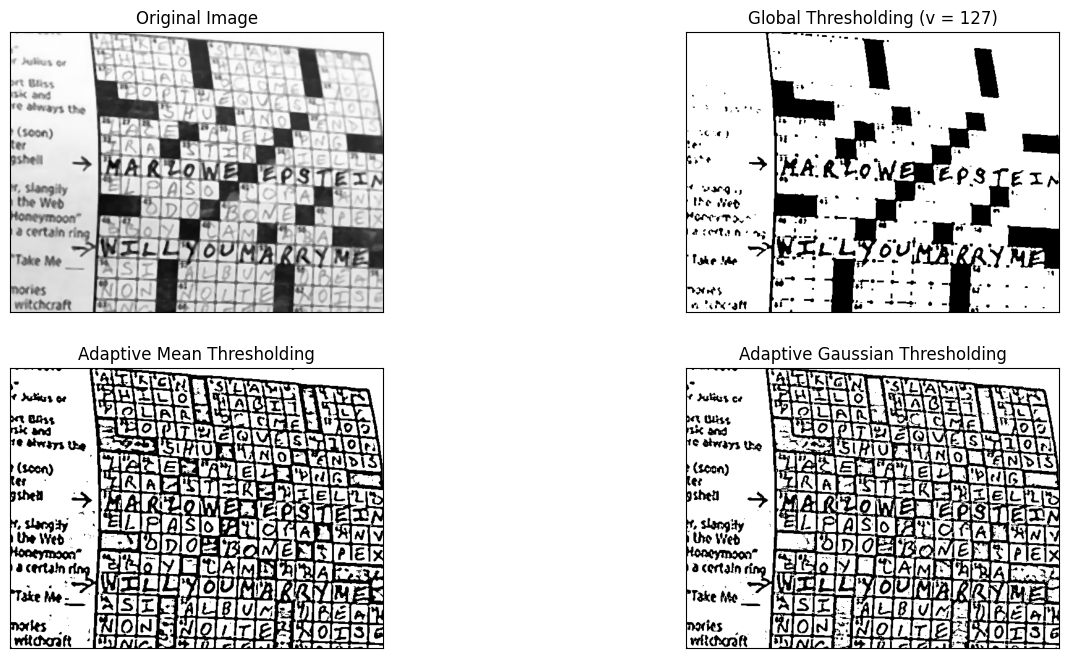

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/creative-proposal.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

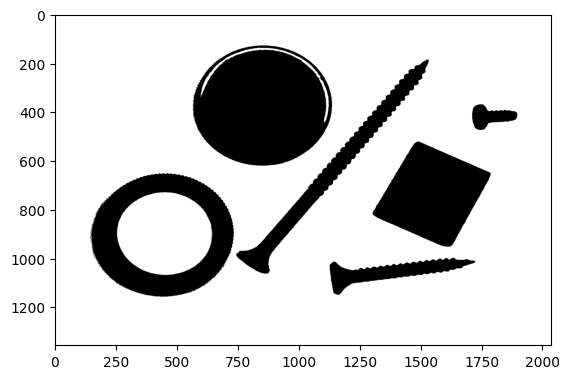

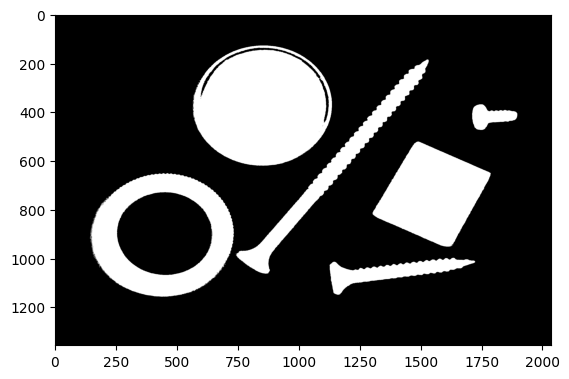

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


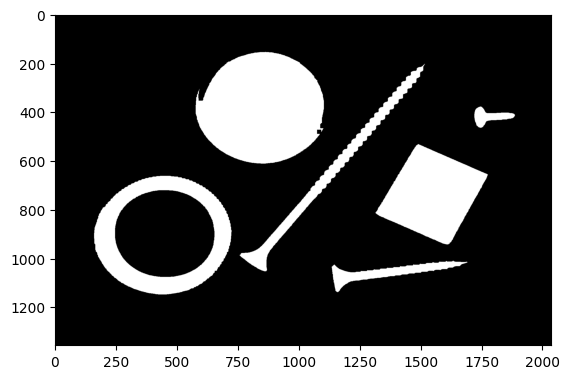

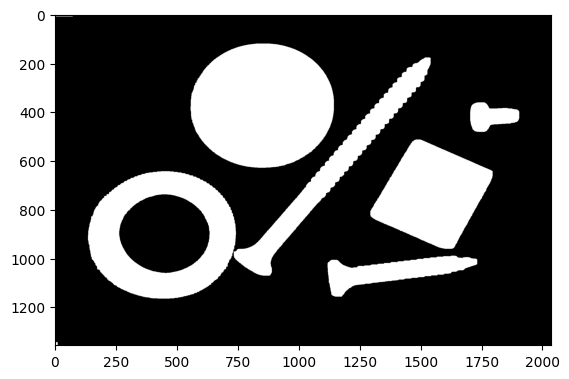

In [6]:
#OTSU Thresholding

imBGR = cv2.imread('images/objects.png')
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

imGray = cv2.cvtColor(imRGB,cv2.COLOR_RGB2GRAY)
# imGray = cv2.equalizeHist(imGray)
ret,thresh_otsu1 = cv2.threshold(imGray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh_otsu2 = cv2.threshold(imGray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


plt.imshow(thresh_otsu1,'gray',vmin=0,vmax=255)
plt.show()

plt.imshow(thresh_otsu2,'gray',vmin=0,vmax=255)
plt.show()


SE=np.ones((9,9),np.uint8)
print(SE)

erosion=cv2.erode(thresh_otsu2,SE,iterations=2)
plt.imshow(erosion,'gray',vmin=0,vmax=255)
plt.show()

dilation=cv2.dilate(thresh_otsu2,SE,iterations=2)
plt.imshow(dilation,'gray',vmin=0,vmax=255)
plt.show()

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


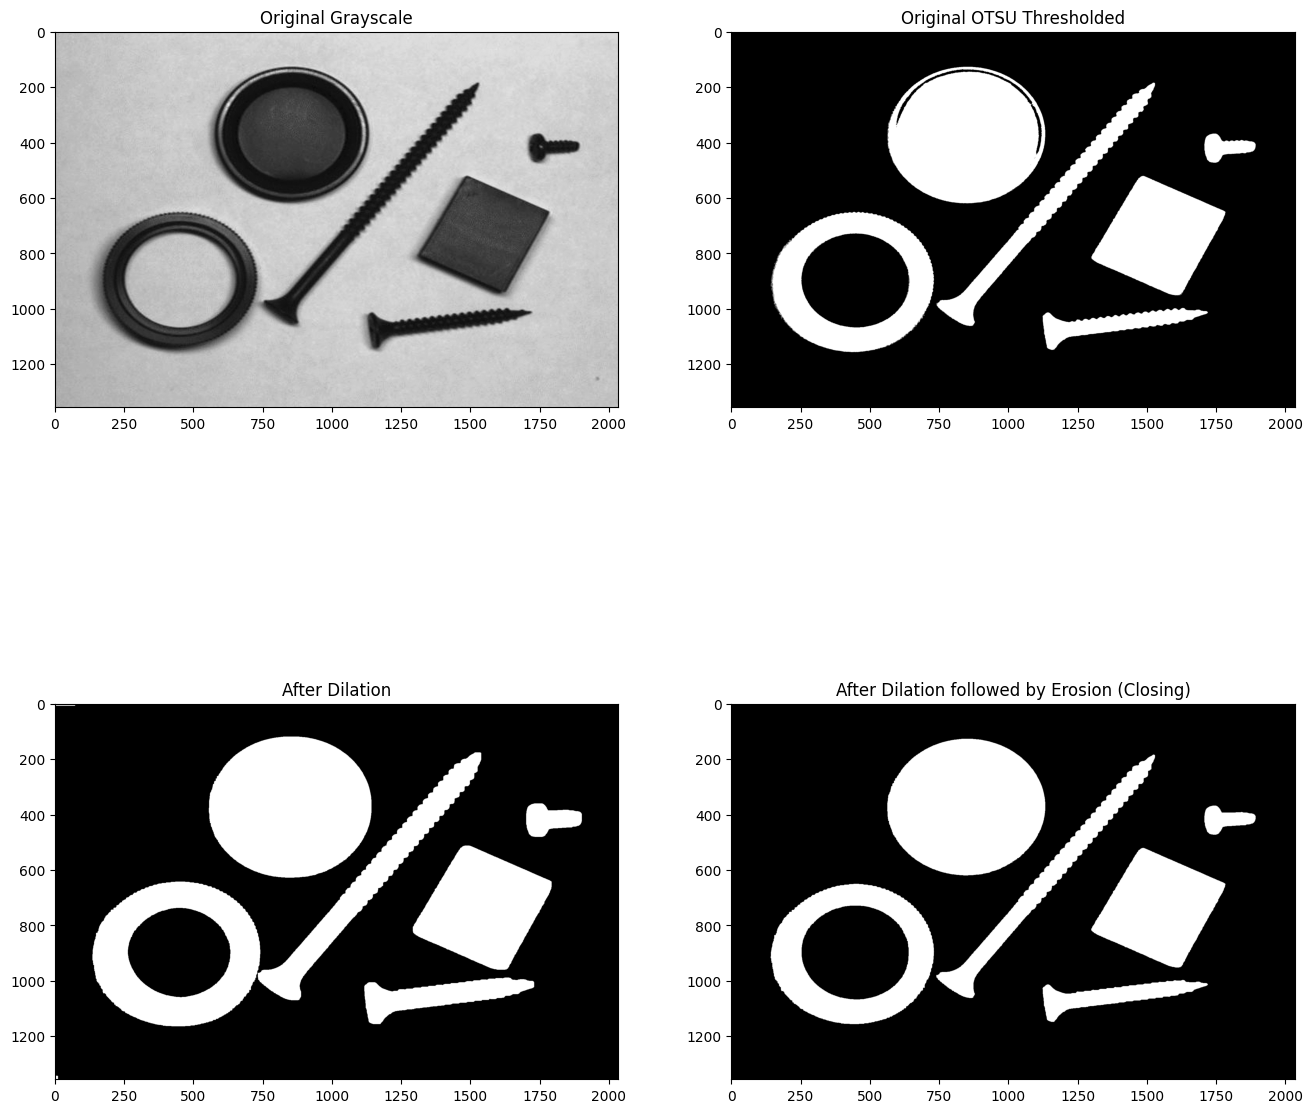

In [7]:
#note that dilation operation above has removed the 'hole artifact' inside the disc object, but now the objects are significantly larger.
#Hence in morphology we frequently follow dilation operation by doing an erosion to restore back to original

#Dilation >>> Erosion is called morphological closing. Useful to remove artefacts from inside objects
#Erosion >>> Dilation is called morphological opening. Useful to remove artefacts from outside larger objects



imBGR = cv2.imread('images/objects.png')
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,16))
imGray = cv2.cvtColor(imRGB,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imGray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(2,2,1)
plt.imshow(imGray,'gray',vmin=0,vmax=255)
plt.title('Original Grayscale')


plt.subplot(2,2,2)
plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.title('Original OTSU Thresholded')

SE=np.ones((9,9),np.uint8)
print(SE)


dilation=cv2.dilate(thresh,SE,iterations=2)
plt.subplot(2,2,3)
plt.imshow(dilation,'gray',vmin=0,vmax=255)
plt.title('After Dilation')

closing=cv2.erode(dilation,SE,iterations=2)
plt.subplot(2,2,4)
plt.imshow(closing,'gray',vmin=0,vmax=255)
plt.title('After Dilation followed by Erosion (Closing)')
plt.show()


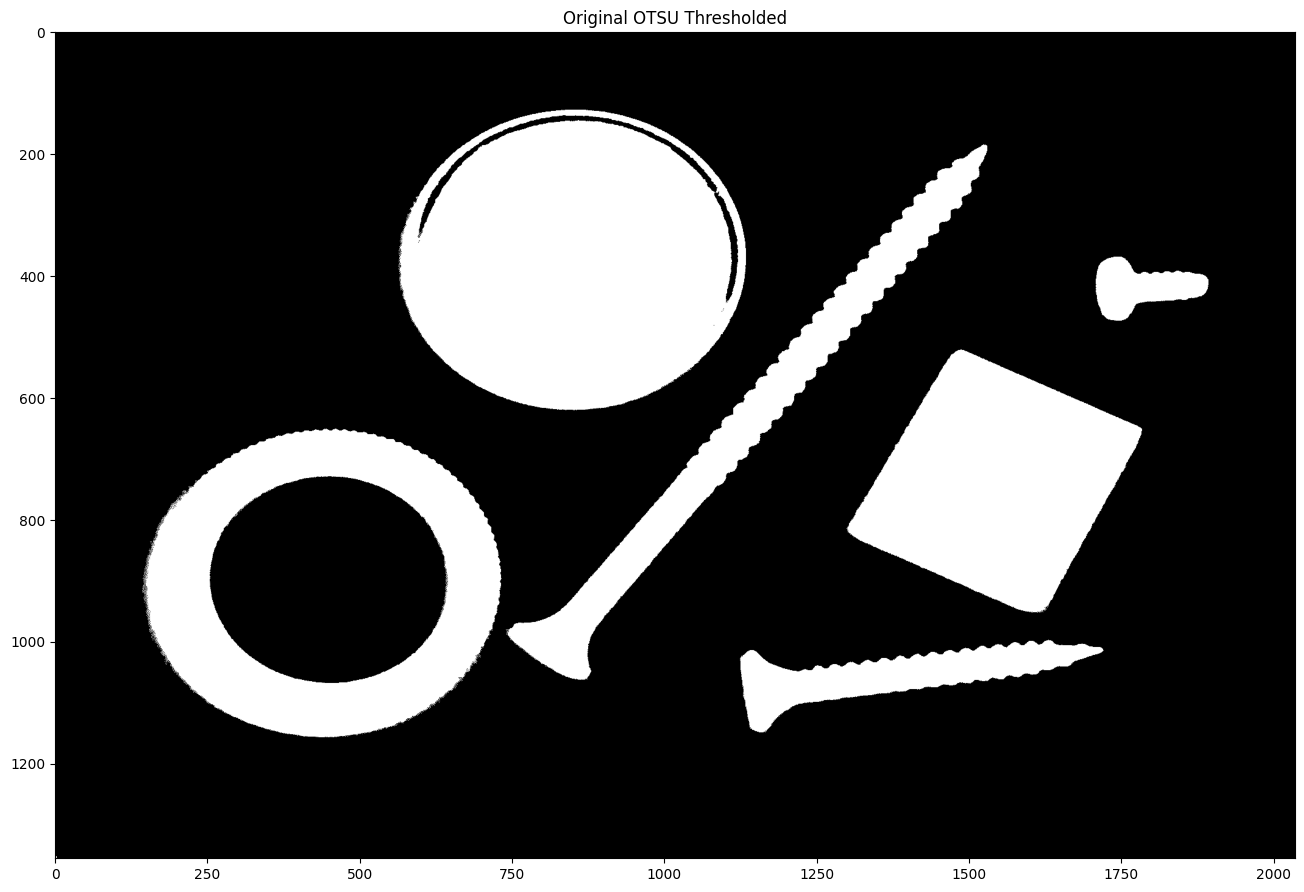

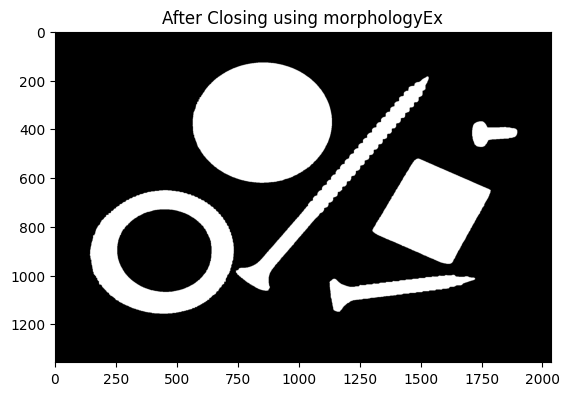

In [8]:
#Faster Closing or opening


imBGR = cv2.imread('images/objects.png')
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,16))
imGray = cv2.cvtColor(imRGB,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imGray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.title('Original OTSU Thresholded')
plt.show()

SE=np.ones((9,9),np.uint8)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, SE, iterations=2)
plt.imshow(closing,'gray',vmin=0,vmax=255)
plt.title('After Closing using morphologyEx')
plt.show()






[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


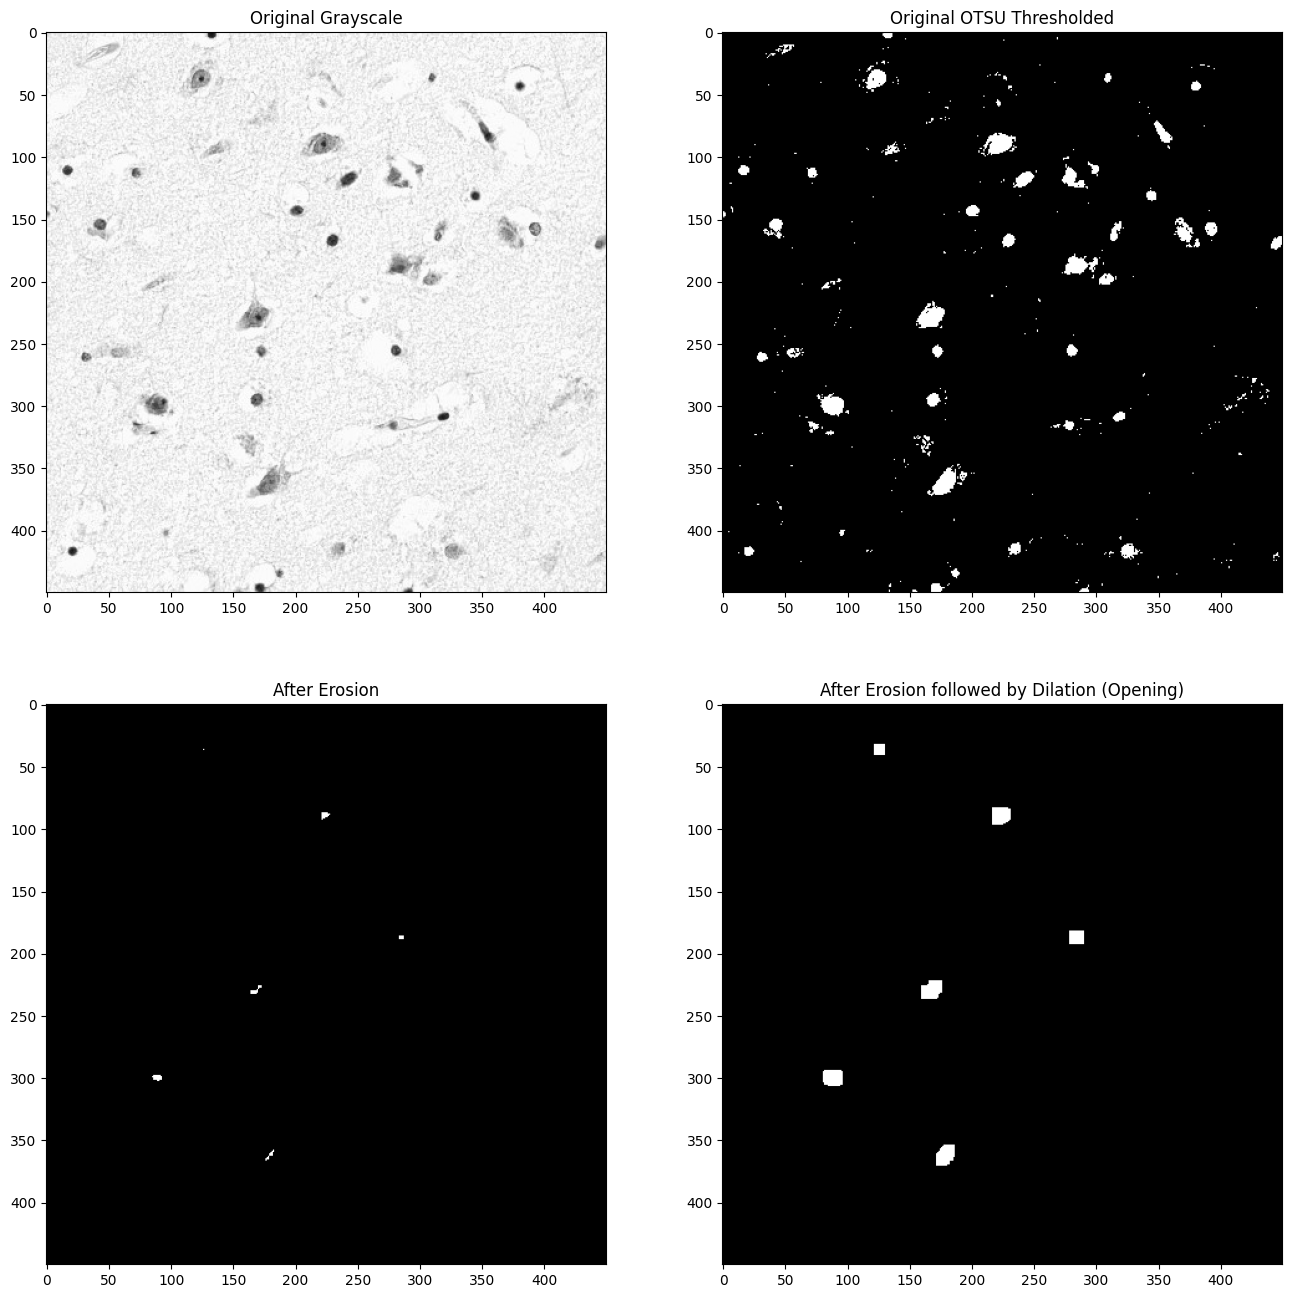

: 

In [ ]:
#Example of morphological opening



imBGR = cv2.imread('images/cells.jpg')
imRGB = cv2.cvtColor(imBGR,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,16))
imGray = cv2.cvtColor(imRGB,cv2.COLOR_RGB2GRAY)
ret,thresh = cv2.threshold(imGray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(2,2,1)
plt.imshow(imGray,'gray',vmin=0,vmax=255)
plt.title('Original Grayscale')


plt.subplot(2,2,2)
plt.imshow(thresh,'gray',vmin=0,vmax=255)
plt.title('Original OTSU Thresholded')

SE=np.ones((9,9),np.uint8)
print(SE)




erosion=cv2.erode(thresh,SE,iterations=1)
plt.subplot(2,2,3)
plt.imshow(erosion,'gray',vmin=0,vmax=255)
plt.title('After Erosion')


open=cv2.dilate(erosion,SE,iterations=1)
plt.subplot(2,2,4)
plt.imshow(open,'gray',vmin=0,vmax=255)
plt.title('After Erosion followed by Dilation (Opening)')
plt.show()